In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

In [2]:
mesh = "mesh.txt"
file = open(mesh, 'r')
tmp = file.readlines()
node_num = int(tmp[0])
elem_num = int(tmp[1])
file.close()
xy = np.loadtxt(mesh, dtype=float, skiprows=2, max_rows=node_num)[:, 0:2]
elem = np.loadtxt(mesh, dtype=int, skiprows=2+node_num, max_rows=elem_num)[:, 1:4]
triangle = tri.Triangulation(xy.T[0], xy.T[1], elem)
del tmp

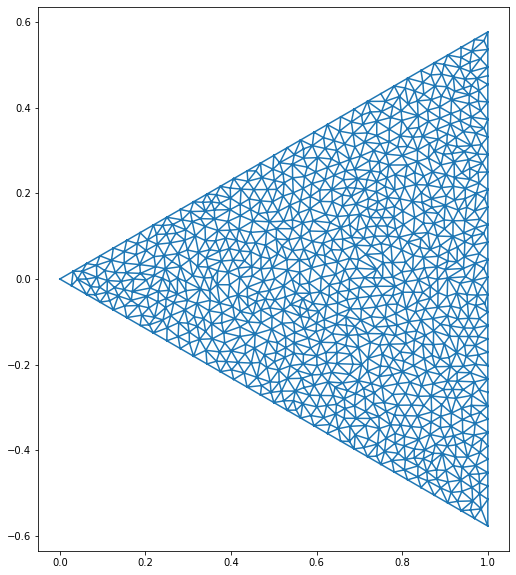

In [3]:
plt.figure(figsize=(10, 10), facecolor="white")
plt.gca().set_aspect(1)
plt.triplot(triangle)
plt.savefig("mesh.png", bbox_inches="tight")
plt.show()

In [4]:
b = 1.0
line = np.sqrt(3) / 3
error = 1e-4
not_boundary_ID = []
for k in range(len(xy)):
    x, y = xy[k]
    error1 = np.abs(x-b)
    error2 = np.abs(y - line * x)
    error3 = np.abs(y + line * x)
    if error1 > error and error2 > error and error3 > error:
        not_boundary_ID.append(k)
        pass
    pass
not_boundary_ID = np.array(not_boundary_ID)

In [5]:
K = np.zeros([node_num, node_num])
B = np.zeros(elem_num)
for k in range(elem_num):
    ID1, ID2, ID3 = elem[k]
    x1, y1 = xy[ID1]
    x2, y2 = xy[ID2]
    x3, y3 = xy[ID3]
    A = 2 * np.linalg.det([
        [1, x1, y1],
        [1, x2, y2],
        [1, x3, y3]
    ])
    k11 = (x2 - x3)**2 + (y2 - y3)**2
    k12 = (x1 - x3) * (-x2 + x3) + (y1 - y3) * (-y2 + y3)
    k13 = (x1 - x2) * (x2 - x3) + (y1 - y2) * (y2 - y3)
    k22 = (x1 - x3)**2 + (y1 - y3)**2
    k23 = -(x1**2 + x2 * x3 - x1 * (x2 + x3) + (y1 - y2) * (y1 - y3))
    k33 = (x1 - x2)**2 + (y1 - y2)**2
    b1 = (x3 * (y1 - y2) + x1 * (y2 - y3) + x2 * (-y1 + y3)) / 6
    b2 = (x3 * (y1 - y2) + x1 * (y2 - y3) + x2 * (-y1+y3)) / 6
    b3 = (x3 * (y1 - y2) + x1 * (y2 - y3) + x2 * (-y1+y3)) / 6

    K[ID1, ID1] += k11 / A;
    K[ID1, ID2] += k12 / A;
    K[ID1, ID3] += k13 / A;

    K[ID2, ID1] += k12 / A;
    K[ID2, ID2] += k22 / A;
    K[ID2, ID3] += k23 / A;

    K[ID3, ID1] += k13 / A;
    K[ID3, ID2] += k23 / A;
    K[ID3, ID3] += k33 / A;

    B[ID1] += b1;
    B[ID2] += b2;
    B[ID3] += b3;
    pass

In [6]:
Km = (K[not_boundary_ID].T[not_boundary_ID]).T
Bm = B[not_boundary_ID]
um = np.linalg.inv(Km) @ Bm
u = np.zeros(node_num)
u[not_boundary_ID] = um

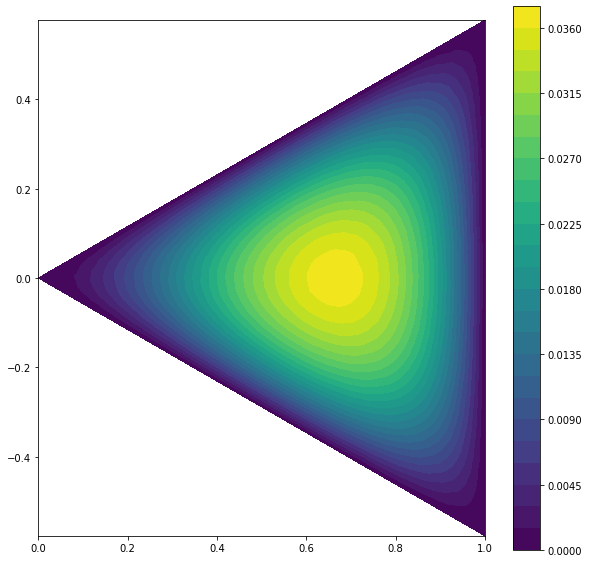

In [7]:
plt.figure(figsize=(10, 10), facecolor="white")
plt.gca().set_aspect(1)
plt.tricontourf(triangle, u, 30)
plt.colorbar()
plt.savefig("result.png", bbox_inches="tight")
plt.show()